- 우리가 학습한 모델은 정확도 100%
- 하지만, 당연히 학습한 데이터로 검증을 하면 정확도가 높게 나옴

> 학습 / 검증 데이터 분리 진행

- 학습: 특징(x_train), 정답(y_train)
- 검증: 특징(x_test), 정답(y_test)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#### 1. 학습(train) / 검증(test) 데이터 나누고 분석하기

In [2]:
# 도미 + 빙어 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [4]:
print(fish_data[4])
print(fish_target[4])

[29.0, 430.0]
1


총: 49마리

simple validation(7:3, 8:2)
학습(train) : 검증(test) => 7:3, 8:2

train(35) : test(14)

In [5]:
# 총 49: 0~48번
fish_data[0:35] # 0 ~ 34
fish_data[:35]  # 처음부터(0) ~ 34

fish_data[35:50] # 35 ~ 49
fish_data[35:]   # 35 ~ 끝까지(49)

[[9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [6]:
# 0~34: 35 학습데이터
train_input = fish_data[:35]
train_target = fish_target[:35]

# 35~49: 14 검증데이터
test_input = fish_data[35:]
test_target = fish_target[35:]

In [7]:
kn = KNeighborsClassifier()

In [8]:
kn.fit(train_input, train_target) # 35마리 학습
kn.score(test_input, test_target) # 14마리 검증

# 샘플링 편향

0.0

In [9]:
# 랜덤 샘플링

# fish_data, fish_target => LIST
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [10]:
print(type(fish_data))
print(type(input_arr))

<class 'list'>
<class 'numpy.ndarray'>


In [11]:
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [12]:
input_arr.shape

(49, 2)

In [13]:
# 랜덤 샘플링

np.random.seed(42) # 랜덤 고정(항상 동일한 랜덤)
index = np.arange(49) # 0 ~ 48까지 1씩 증가하는 배열
np.random.shuffle(index)

In [14]:
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [15]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

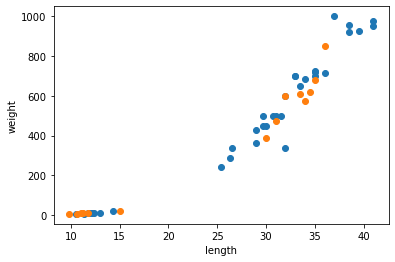

In [16]:
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##### 5. 두 번째 분류 모델

In [17]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [18]:
kn.score(test_input, test_target)

1.0

In [19]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [20]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])